# Point operations
In this notebook we show some homogeneneous point operations. They depends only on one pixel and not on any other neighbor pixel.

In [1]:
import numpy as np
import skimage
from skimage import io
from skimage import util
import matplotlib.pyplot as plt

## Contrast and brightness
Enhancing the contrast of an image makes objects more distinguishable, while enhancing its brightness augments the intensity of the pixels. The contrast of an image is defined as the difference between a pixel value and the mean value of ts neighboring pixels and it can be increased by increasing the variance of the image. The brightness of an image can be increased simply by adding a constant to its pixels' values. 

(360, 256, 4)

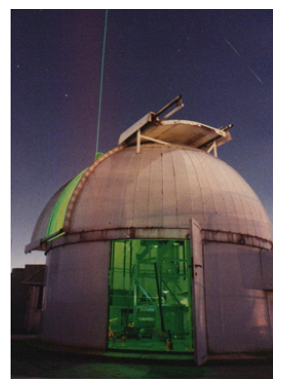

In [2]:
img = io.imread('images/lidar.png') 
plt.axis('off')
plt.imshow(img)
img.shape

Let's compute the mean and the variance for one channel. We import some functions that have been implemented in other notebooks.

In [33]:
#from ipynb.fs.full.histograms import dip_mean
#from ipynb.fs.full.histograms import dip_variance
%run dip_functions.ipynb

In [4]:
img_r = img[:,:,0] # use only one channel red = 0
mean_img_r = dip_mean(img_r)
variance_img_r = dip_variance(img_r)
print("Mean: {0:5.1f}, Variance {1:5.1f} %".format(mean_img_r, variance_img_r))

Mean:  74.4, Variance 2166.3 %


We start by changing the contranst and the brightness of a single channel image, e.g. the red channel. If v is the value of a pixel in that channel, we can enhance its contrast by multiplying it by a constant c. We can enhance the pixel's brightness by adding a constant value b to it.

$$v' = cv + b$$

We want to enhance an image by changing its contrast and brightness so we define a function to do that

In [5]:
def dip_setContrastBrightness(image, contrast, brightness):
    rows, cols = image.shape
    image_cb = np.zeros((rows, cols), dtype=int)
    for col in np.arange(0, cols, 1):
        for row in np.arange(0, rows, 1):
            v = image[row, col]
            vcb = int(round( contrast * v + brightness ))
            if vcb > 255: vcb = 255
            image_cb[row, col] = vcb
    return image_cb        

Now we use this function to enhance an image contrast by 1.2 and its brightness by 10

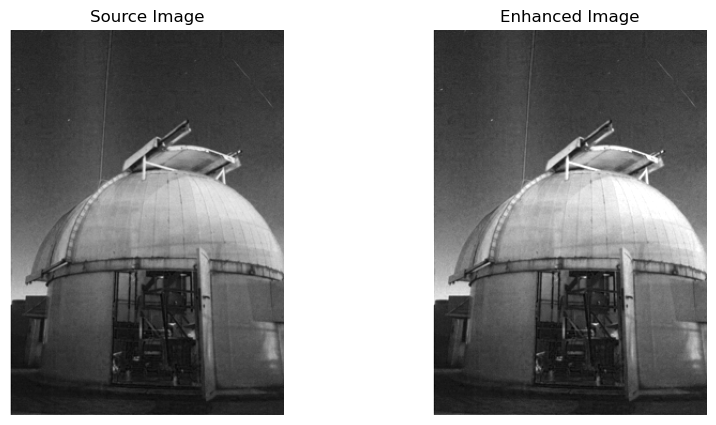

In [6]:
img_r_cb = dip_setContrastBrightness(img_r, 1.2, 10)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].set_axis_off()
axes[0].set_title('Source Image')
axes[0].imshow(img_r, cmap='gray')
axes[1].set_axis_off()
axes[1].set_title('Enhanced Image')
axes[1].imshow(img_r_cb, cmap='gray')

We compute the mean and the variance of the enhanced image

In [7]:
mean_img_r_cb = dip_mean(img_r_cb)
variance_img_r_cb = dip_variance(img_r_cb)
print("Mean: {0:5.1f}, Variance {1:5.1f} %".format(mean_img_r_cb, variance_img_r_cb))

Mean:  99.2, Variance 3103.2 %


and we plot the distribution of the pixels value for both the original image and its enhanced version for comparison

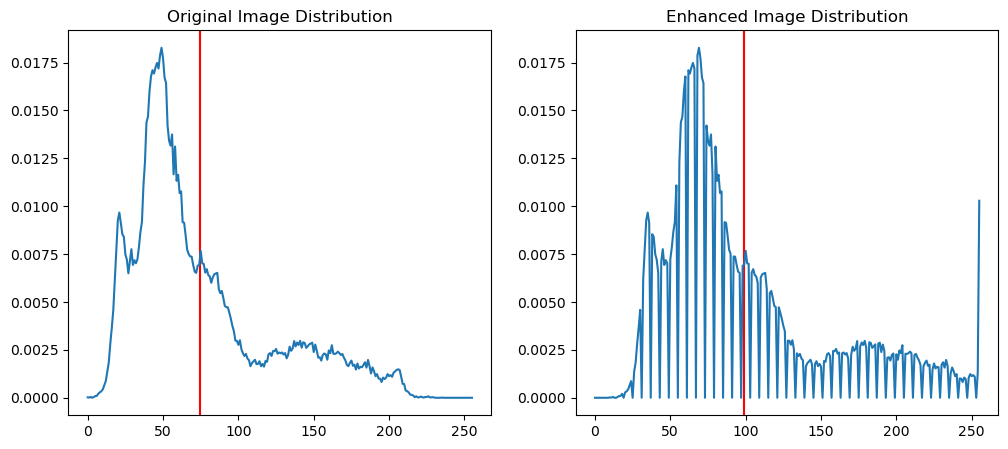

In [10]:
#from ipynb.fs.full.histograms import dip_image_dist
img_r_dist = dip_image_dist(img_r)
img_r_cb_dist = dip_image_dist(img_r_cb)
x =np.arange(0, 256)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].set_title('Original Image Distribution')
axes[0].axvline(x=mean_img_r, color='r', linestyle='-')
axes[0].plot(x, img_r_dist)
axes[1].set_title('Enhanced Image Distribution')
axes[1].axvline(x=mean_img_r_cb, color='r', linestyle='-')
axes[1].plot(x, img_r_cb_dist)

By changing the values for contrast and brightness we can see that the brightness just moves the distribution to the right, while the contrast widens the shape of the distribution. The enhancement can also saturate the image as we can see at the peak of the enhanced image distribution at the far right. We now implement the enhancement function for an image with all its RGB channels.

In [11]:
def dip_setRgbContrastBrightness(image, contrast, brightness):
    rows = image.shape[0]
    cols = image.shape[1]
    rgb = image.shape[2]
    image_cb = np.zeros((rows, cols, rgb), dtype=int)
    for ch in range(0, rgb):
        for col in np.arange(0, cols, 1):
            for row in np.arange(0, rows, 1):
                v = image[row, col, ch]
                vcb = int(round( contrast * v + brightness ))
                if vcb > 255: vcb = 255
                image_cb[row, col, ch] = vcb
    return image_cb        

We apply the same contrast and brightness as before on the image with all its RGB channel to see visually the changes.

(360, 256, 4)


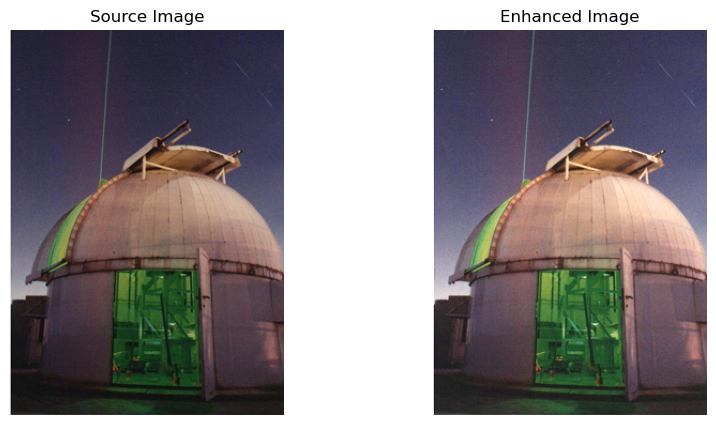

In [12]:
img_cb = dip_setRgbContrastBrightness(img, 1.2, 10)
print(img_cb.shape)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].set_axis_off()
axes[0].set_title('Source Image')
axes[0].imshow(img)
axes[1].set_axis_off()
axes[1].set_title('Enhanced Image')
axes[1].imshow(img_cb)

## Image inversion

In [13]:
def dip_invert(image):
    rows, cols = image.shape
    inverted_image = np.zeros((rows, cols), dtype=int)
    for col in np.arange(0, cols, 1):
        for row in np.arange(0, rows, 1):
            v = image[row, col]
            inverted_image[row, col] = 255 - v
    return inverted_image

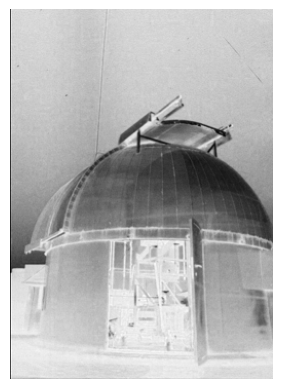

In [14]:
lidar_inv = dip_invert(img_r)
plt.axis('off')
plt.imshow(lidar_inv, cmap='gray')

We show how the inversion operation affects the histogram of the image

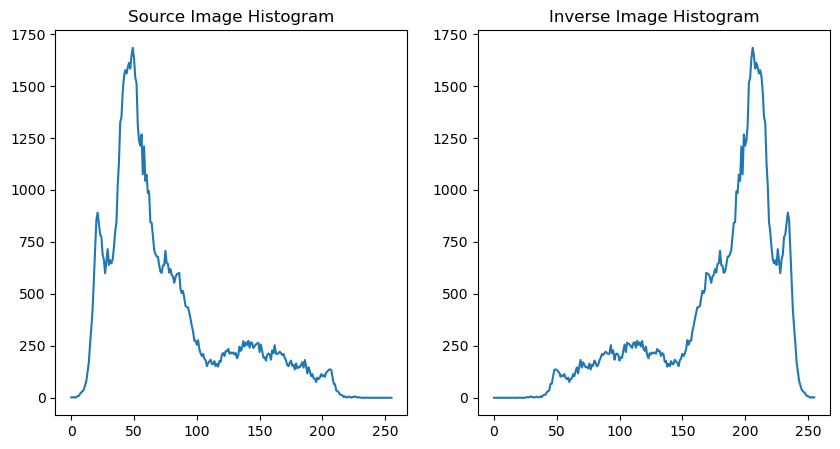

In [16]:
#from ipynb.fs.full.histograms import dip_histogram
histogram = dip_histogram(img_r)
inverse_histogram = dip_histogram(lidar_inv)
x =np.arange(0, 256, 1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].set_title('Source Image Histogram')
axes[0].plot(x, histogram)
axes[1].set_title('Inverse Image Histogram')
axes[1].plot(x, inverse_histogram)

The same result can be obtained using the scikit-image function for [image inversion](https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html?highlight=inversion#image-inversion)

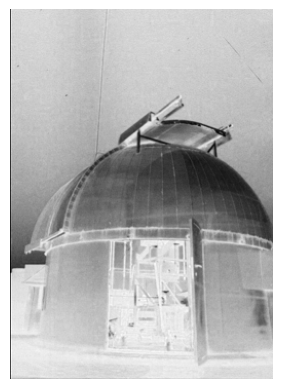

In [17]:
inverted_lidar = util.invert(img_r)
plt.axis('off')
plt.imshow(inverted_lidar, cmap='gray')

## Thresholding
Thresholding is used to create a binary image from a grayscale image. The function returns a binary image with all the cells whose value in the input image is equal or below the threshold to the minimum value, and those whose value is above the threshold to the maximum.

In [18]:
def dip_threshold(image, threshold, max, min):
    rows, cols = image.shape
    threshold_image = np.zeros((rows, cols), dtype=int)
    for col in np.arange(0, cols, 1):
        for row in np.arange(0, rows, 1):
            v = image[row, col]
            if v > threshold:
                threshold_image[row, col] = max
            else:
                threshold_image[row, col] = min
    return threshold_image

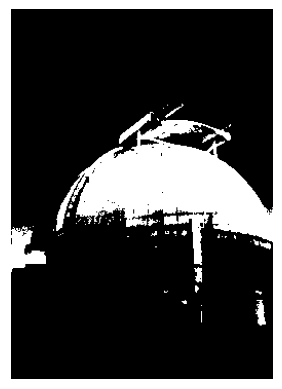

In [19]:
lidar_thr = dip_threshold(img_r, 128, 255, 0)
plt.axis('off')
plt.imshow(lidar_thr, cmap='gray')

After the thresholding the histogram of the image has only two entries

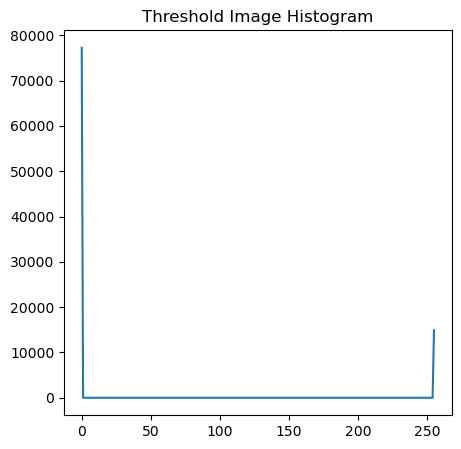

In [20]:
hist_threshold = dip_histogram(lidar_thr)
x =np.arange(0, 256, 1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.set_title('Threshold Image Histogram')
plt.plot(x, hist_threshold)

scikit-image provides more sophisticated [thresholding functions](https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html)

## Histogram equalization

The purpose of the equalization is to find a point operation that transforms the value of each pixel of a source image in  such a way that the histogram of the equalized image becomes approximately uniformly distributed or in other words, so that each pixel value of the equalized image occurs the same number of times. The histogram of the equalized image is also called the reference histogram. It is clear that we have to apply the same point transformation to all the pixels of the source image that share the same value v so that they get the value v' in the equalized image. One easy way would be to use the histogram of the source image $h(v)$ and the histogram of the equalized image $h_e(v')$ so that 

$$h(v) = h_e(v')$$

from which we could compute the value v' of the equalized image that corresponds to the value v of the source image

$$v' = h_e^{-1}(h(v))$$

the problem is that there might be more then one value v with the same histogram h(v) so it won't be clear to which we have to apply the inverse operation $h_e^{-1}$. We can avoid this problem by using the cumulative histograms that are always monotonic and for which there is only one value for the inverse. So we use the condition

$$H(v) = H_e(v')$$

from which in a similar way as before we get the value v'

$$v' = H_e^{-1}(H(v))$$

Let's assume for simplicity that the size of our source image is MxN and that the range of its pixel values is [0, 255]. By definition of cumulative histogram

$$H(255) = H_e(255) = MN$$

We can also assume that $H(0) = H_e(0) = 0$. Since the cumulative histogram of the equalized image is linear we have

$$H_e(v') = \frac{MN}{255}v' = H(v)$$

from which we can compute the value v' of the equalized image to which the value v of the source image must be mapped.

$$v' = \frac{255}{MN}H(v)$$

We can easily translate the math into code 

In [26]:
#from ipynb.fs.full.histograms import dip_cumulativeHistogram
img = skimage.data.moon()
img_histogram = dip_histogram(img)
img_cumulative_hist = dip_cumulativeHistogram(img_histogram)

In [27]:
def dip_equalize(image, cumulative_histogram):
    rows, cols = image.shape
    equalized_image = np.zeros((rows, cols), dtype=int)
    for col in np.arange(0, cols, 1):
        for row in np.arange(0, rows, 1):
            v = image[row, col]
            equalized_image[row, col] = cumulative_histogram[v] * 255 / (rows * cols)
    return equalized_image

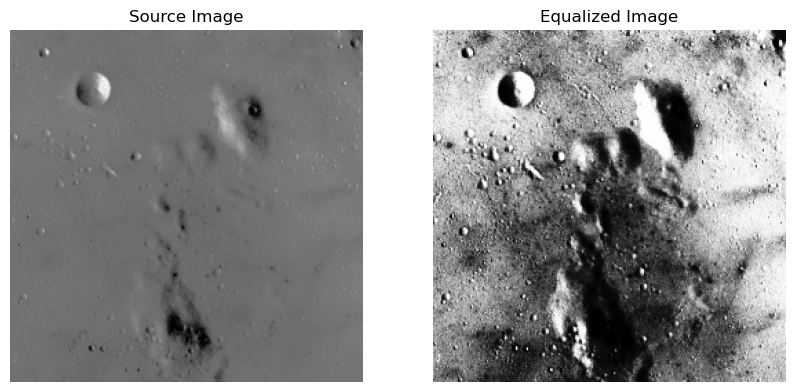

In [28]:
img_equalized = dip_equalize(img, img_cumulative_hist)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax1.set_axis_off()
ax2.set_axis_off()
ax1.set_title('Source Image')
ax1.imshow(img, cmap='gray')
ax2.set_title('Equalized Image')
ax2.imshow(img_equalized, cmap='gray')

The cumulative histogram of the equalized image should be linear

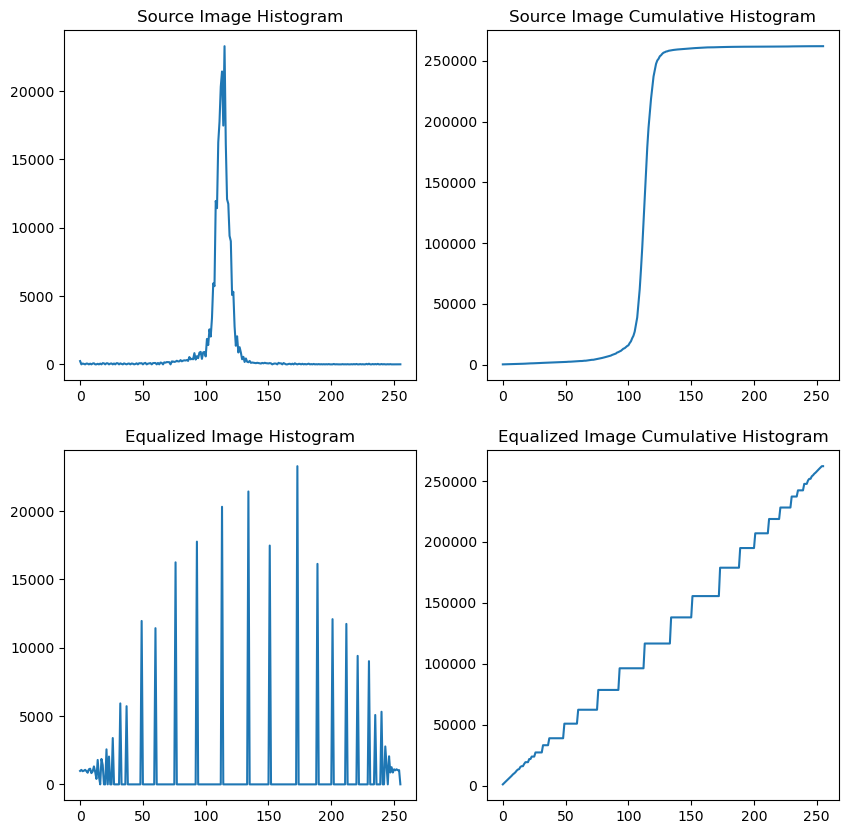

In [29]:
img_eq_histogram = dip_histogram(img_equalized)
img_eq_cumulative_histogram = dip_cumulativeHistogram(img_eq_histogram)
x =np.arange(0, 256, 1)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes[0,0].set_title('Source Image Histogram')
axes[0,0].plot(x, img_histogram)
axes[0,1].set_title('Source Image Cumulative Histogram')
axes[0,1].plot(x, img_cumulative_hist)
axes[1,0].set_title('Equalized Image Histogram')
axes[1,0].plot(x, img_eq_histogram)
axes[1,1].set_title('Equalized Image Cumulative Histogram')
axes[1,1].plot(x, img_eq_cumulative_histogram)

scikit-image provides two functions for [histogram equalization](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html)

## Histogram matching
We may be interested in changing the distribution of the pixels' values of an image to be equal to the distribution of a reference image (see also the scikit-image documentation about [histogram matching](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_histogram_matching.html). We'll follow the same approach used for image equalization the sole difference being that the reference cumulative distribution generally will not be linear. Since the size of the two images are generally different we'll use the probability distributions instead of the histograms and the cumulative probability distributions instead of the cumulative histograms. 

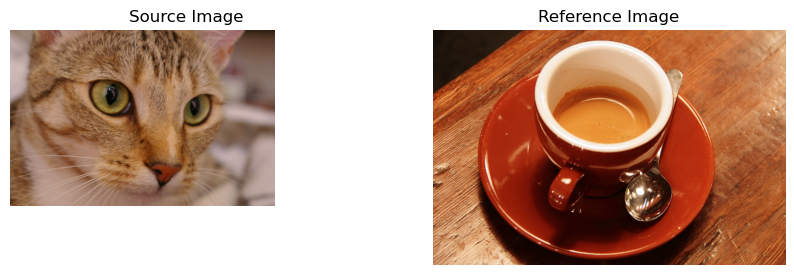

In [30]:
reference_img = skimage.data.coffee()
source_img = skimage.data.chelsea()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
axes[0].set_axis_off()
axes[0].set_title('Source Image')
axes[0].imshow(source_img)
axes[1].set_axis_off()
axes[1].set_title('Reference Image')
axes[1].imshow(reference_img)

We start by looking at the probability and cumulative distributions of the source and reference image, taking into account that they are color images and so we have to consider each channel separately.

In [34]:
#from ipynb.fs.full.histograms import dip_image_cumulative_dist
#from ipynb.fs.full.histograms import dip_image_dist
#from ipynb.fs.full.histograms import dip_rgb_image_dist
#from ipynb.fs.full.histograms import dip_rgb_image_cumulative_dist
source_dist = dip_rgb_image_dist(source_img)
source_cdf = dip_rgb_image_cumulative_dist(source_img)
reference_dist = dip_rgb_image_dist(reference_img)
reference_cdf = dip_rgb_image_cumulative_dist(reference_img)

We plot the probability and cumulative distribution for only one channel of the source image

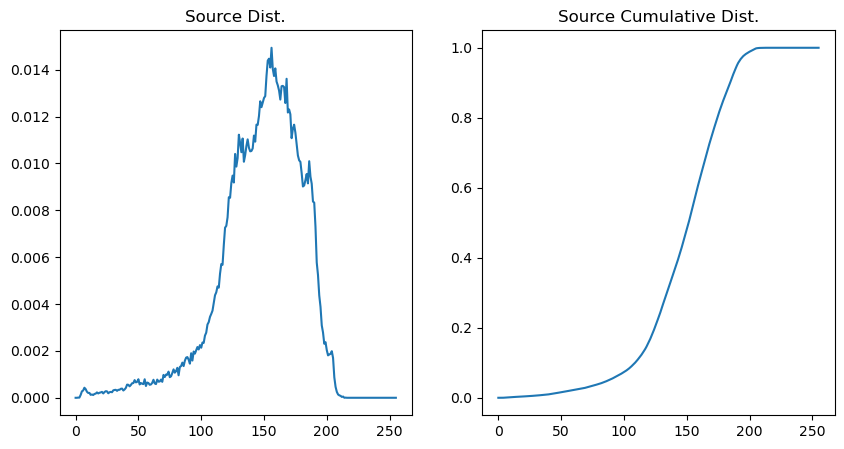

In [35]:
x =np.arange(0, 256, 1)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.set_title('Source Dist.')
ax1.plot(x, source_dist[0])
ax2.set_title('Source Cumulative Dist.')
ax2.plot(x, source_cdf[0])

and the same for the reference image

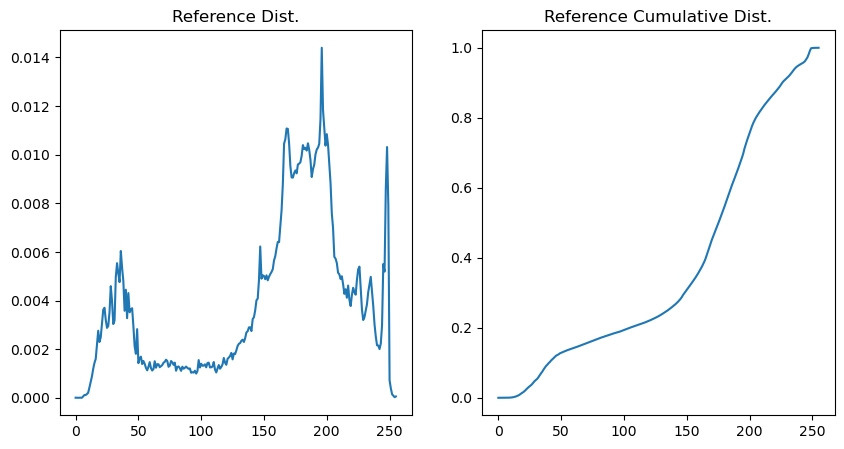

In [36]:
x =np.arange(0, 256, 1)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.set_title('Reference Dist.')
ax2.set_title('Reference Cumulative Dist.')
ax1.plot(x, reference_dist[0])
ax2.plot(x, reference_cdf[0])

The difference between the equalization case and the histogram matching is that we cannot assume the reference cumulative distribution $H_r(v)$ to be linear so we have to find how to proceed

$$v' = H_r^{-1}(H(v))$$

We plot the source and reference cumulative distributions 

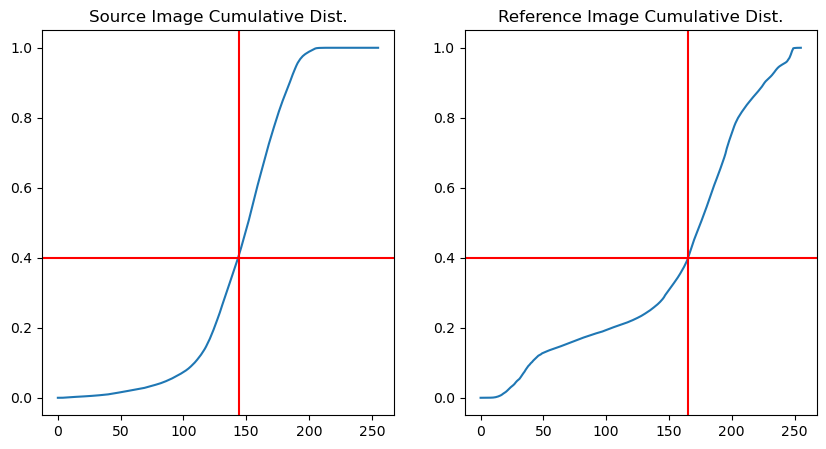

In [37]:
x =np.arange(0, 256, 1)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.set_title('Source Image Cumulative Dist.')
ax1.plot(x, source_cdf[0])
ax2.set_title('Reference Image Cumulative Dist.')
ax2.plot(x, reference_cdf[0])
ax1.axhline(y=0.4, color='r', linestyle='-')
ax2.axhline(y=0.4, color='r', linestyle='-')
ax1.axvline(x=144, color='r', linestyle='-')
ax2.axvline(x=165, color='r', linestyle='-')

For each pixel value v 
1. we find the source cumulative probability (e.g. v=144 -> cds(144) = 0.4)
2. we find the reference pixel value v' that has the same probability (e.g. v'=165 -> cdr(165) = 0.4)
3. we set the  pixel value of the matched image to the reference value (e.g. from 144 to 165)

Step 2 means that we have to compute the inverse of the reference cumulative distribution. An algorithm to create the inverse function is to split the range of values using a certain number N of control points $(v_j', P_j)$ where $P_j = H_r(v_j')$, and approximate the reference cumulative distribution with a linear function between any pair of adjacent control points $P_j$ and $P_{j+1}$ so that it will be possible to compute the inverse of the reference cumulative distribution in the same way in which we have computed the inverse of the equalized cumulative histogram. Between any two control point the following relations hold

$$H_r(v') = \frac{P_{j+1} - P_j}{v_{j+1}' - v_j'}(v' - v_j') + P_j = H(v)$$

and solving for v' we get

$$v' = \frac{v_{j+1}' - v_j'}{P_{j+1} - P_j}(H(v) - P_j) + v_j'$$

for $v_j' \le v \le v_{j+1}'$

We compute the control points and the slopes of the segments that are used to approximate the reference cumulative distribution.

In [38]:
def dip_control_points(N, reference_cdf):
    
    # Returns the pairs of control points for a reference cumulative distribution
    # and the slopes of the segments between them
    
    cp = [[0, 0.0, 0, 0.0]] * N # initialize control points [x1, y1, x2, y2]
    slopes = np.zeros(N, dtype='float64')
    counter = 0
    step = 255 // (N - 1)
    # computes control points
    for v in np.arange(0, 255 - step, step):
        x1 = v
        y1 = reference_cdf[v]
        x2 = v + step - 1
        y2 = reference_cdf[v + step - 1]
        cp[counter] = [x1, y1, x2, y2] 
        #slopes[counter] = (y2 - y1) / (x2 - x1)
        slopes[counter] = (x2 - x1) / (y2 - y1)  
        counter = counter + 1
    cp[N - 1][0] = cp[N - 2][2] + 1
    cp[N - 1][1] = reference_cdf[cp[N - 2][2] + 1] 
    cp[N - 1][2] = 255
    cp[N - 1][3] = 1.0
    slopes[N - 1] = (cp[N - 1][2] - cp[N - 1][0]) / (cp[N - 1][3] - cp[N - 1][1]) 
    return cp, slopes

In [39]:
cps, slopes = dip_control_points(11, reference_cdf[0]) # use odd number of points
slopes

array([ 796.57032222,  255.35310547,  728.83715045,  813.32956792,
        721.71407092,  320.53422371,  133.42908105,   96.80184192,
        180.80798569,  230.17902813, 7185.62874251])

We plot the segments on top of the reference cumulative distribution to have a visual idea of how close they are.

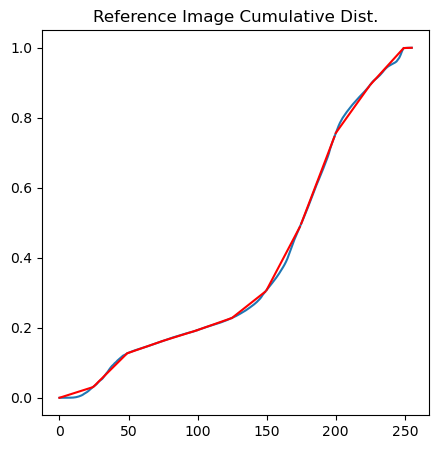

In [40]:
x =np.arange(0, 256, 1)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
axes.set_title('Reference Image Cumulative Dist.')
axes.plot(x, reference_cdf[0])
for i in range(0, 11):
    axes.plot((cps[i][0], cps[i][2]), (cps[i][1], cps[i][3]), color='r', linestyle='-')

Now to find the pixel value that corresponds to the inverted reference distribution we have to use the right segment for each pixel value and we can easily implement a function that does just that   

In [41]:
def dip_interval_index(value, control_points):
    # Computes the interval between a pair of control points the input value belongs to 
    N = len(control_points)
    for i in range(0, N):
        if value >= control_points[i][0] and value <= control_points[i][2]:
            return i

In [42]:
dip_interval_index(252, cps)

10

We have now all ther pieces to invert the pixel values from a reference distribution to the matched one

In [43]:
def dip_match_histogram(source_img, N, source_cdf, reference_cdf):
    # Computes the matched image from the source image using the 
    # source and reference cumulative distributions
    cp, slopes = dip_control_points(N, reference_cdf) # control points
    rows, cols = source_img.shape
    matched_image = np.zeros((rows, cols), dtype=int)
    for col in np.arange(0, cols, 1):
        for row in np.arange(0, rows, 1):
            v = source_img[row, col]
            i = dip_interval_index(v, cp)
            matched_image[row, col] = int(round( slopes[i] * (source_cdf[v] - cp[i][1]) + cp[i][0] ))
            # clamping pixels whose value falls outside the range [0,255]
            if matched_image[row, col] > 255:
                matched_image[row, col] = 255
            if matched_image[row, col] < 0:
                matched_image[row, col] = 0
    return matched_image

We apply the inversion function for each channel of the source image and then we put the result into one multidimensional array

In [44]:
matched_img_red = dip_match_histogram(source_img[:,:,0], 21,source_cdf[0], reference_cdf[0])
matched_img_green = dip_match_histogram(source_img[:,:,1],21,source_cdf[1], reference_cdf[1])
matched_img_blue = dip_match_histogram(source_img[:,:,2], 21,source_cdf[2], reference_cdf[2])
rows = source_img.shape[0]
cols = source_img.shape[1]
matched_img = np.zeros((rows, cols, 3), dtype=int)
matched_img[:,:,0] = matched_img_red  
matched_img[:,:,1] = matched_img_green  
matched_img[:,:,2] = matched_img_blue

In [45]:
matched_img.shape

(300, 451, 3)

We can finally show the matched image and compare it with the original one. We can see that the color resemble those in the reference image.

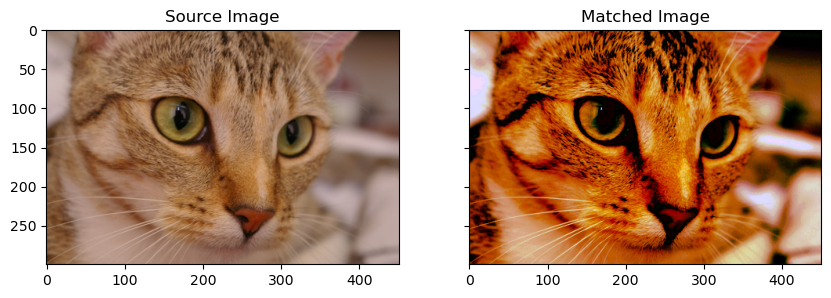

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
axes[0].set_title('Source Image')
axes[0].imshow(source_img)
axes[1].set_title('Matched Image')
axes[1].imshow(matched_img)

Last, we plot the cumulative distribution of the matched image to show that it is close to the cumulative distribution of the reference image.

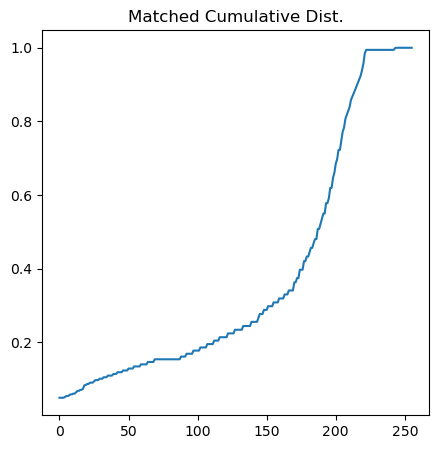

In [47]:
matched_cdf = dip_rgb_image_cumulative_dist(matched_img)
x =np.arange(0, 256, 1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.set_title('Matched Cumulative Dist.')
ax.plot(x, matched_cdf[0])

In [48]:
plt.close('all')